7-1 인공신경망
-

In [1]:
from tensorflow import keras

In [3]:
# 튜플로 묶여 있기 때문에 train, test도 튜플로 묶어줌

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

In [5]:
test_input.shape

(10000, 28, 28)

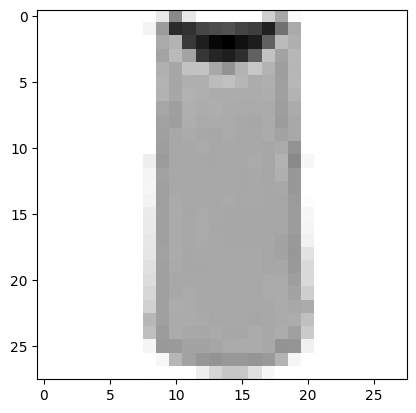

In [22]:
import matplotlib.pyplot as plt
plt.imshow(train_input[2], cmap = 'gray_r')          # 0 (검정), 1 (흰)

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize = (10,10))

for i in range(10):
  axs[i]

In [11]:
### 1. 로지스틱 회귀

In [18]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)  # (60000, 28, 28) 60000 = -1 / 2차원 샘플을 1차원으로 합침 (SGD는 2차원 입력을 다루지 못함.)

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(scores)

{'fit_time': array([10.6392839 , 11.19727159, 11.93681526, 11.42989969,  8.0660603 ]), 'score_time': array([0.04939556, 0.05745959, 0.04356217, 0.04663301, 0.03231883]), 'test_score': array([0.821     , 0.78741667, 0.83516667, 0.8155    , 0.799     ])}


In [21]:
### 7-1 인공신경망
# - 확률적 경사 하강법의 로지스틱 회귀와 유사 (SGDClassifier)
# - 정확도가 더 높음.
# 층 -> 모델 -> 손실함수 지정 / 학습 ,평가

In [23]:
import tensorflow as tf # keras : 텐서플로우의 고수준 api

In [24]:
# 1. 훈련 세트, 검증 세트로 나누기 (80/20)

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [25]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [26]:
# 2. 신경망 생성

dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))
# 10개의 분류 / 활성화 함수 : sigmoid or softmax(다중분류)/ input_shape : 내가 가진 데이터의 크기 (28*28)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# 3. 신경망 dense를 전달한 모델을 만듦.

model = keras.Sequential([dense])

In [28]:
# 4. compile로 손실함수 정의

model.compile(loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
# 손실함수 지정(이진분류시 binery_crossentropy)/ metrics = 학습 방향 지정 (정확성 높은 방식)

In [29]:
# 5. 학습

model.fit(train_scaled, train_target,epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7364 - loss: 0.7762
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8346 - loss: 0.4864
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8472 - loss: 0.4528
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8518 - loss: 0.4346
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8561 - loss: 0.4270


In [30]:
# 6. 평가

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.4420


[0.4499572813510895, 0.846666693687439]